In [1]:
import numpy as np;
import matplotlib as mp;
import matplotlib.pyplot as plt;
import matplotlib.patches as patches;
import pandas as pd;
import math;

# Mean and variance

Python offers several alternatives for easy evaluation of the sample mean and variance of data. Let us see e.g., how to solve this problem using numpy. Remember, these two fundamental statistics are defined as 
\begin{eqnarray}
\overline{X} &=& \frac{1}{n}\sum_{i=1}^n x_i, \nonumber \\
S^2 &=& \frac{1}{n-1}\sum_{i=1}^n (x_i - \overline{X})^2 \nonumber
\end{eqnarray}

Let us generate random samples for which we know the true mean and variance, and "check" whether we get something close using the sample mean and variance. E.g., we can generate Normal distributed random numbers with prescribed mean $\mu$ and variance $\sigma^2$:

In [2]:
mu,sigma,num_points = 20,5.0,10000;
normal_data = np.random.normal(mu,sigma,num_points);

To evaluate the sample mean and variance of the generated data we can use numpy's built in mean and var functions. **CAUTION!** numpy.var() is a general function where the denominator in the formula of $S^2$ is $n-ddof$, where the parameter $ddof$ is 0 by default. 

In [3]:
mean,var = np.mean(normal_data),np.var(normal_data,ddof=1.0); # the denominator in S^2 is n-ddof. The default
                                                              # value is 0, so we need to set it to 1.
print('mean = ',mean,' var =',var,' sigma =',math.sqrt(var));

mean =  19.96215566399999  var = 25.26119556623407  sigma = 5.026051687580826


## Convergence of the sample mean and variance

Let us now examine the convergence of the sample mean and variance by plotting them as a functions of the included number of data points. 

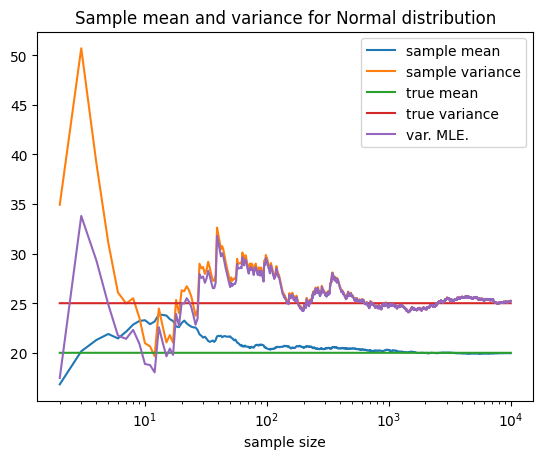

In [4]:
plt.clf();
mean_list = [np.mean(normal_data[0:i]) for i in range(2,len(normal_data)+1)];
var_list = [np.var(normal_data[0:i],ddof=1.0) for i in range(2,len(normal_data)+1)];
var_alt_list = [np.var(normal_data[0:i]) for i in range(2,len(normal_data)+1)];

data_size_list = range(2,len(mean_list)+2);
mu_list,sigma_list = [mu]*len(mean_list),[sigma**2]*len(var_list);

plt.semilogx(data_size_list,mean_list,label='sample mean');
plt.semilogx(data_size_list,var_list,label='sample variance');
plt.semilogx(data_size_list,mu_list,label='true mean');
plt.semilogx(data_size_list,sigma_list,label='true variance');
plt.semilogx(data_size_list,var_alt_list, label = 'var. MLE.');
plt.legend(loc= 'upper right',fontsize = 10);
plt.title('Sample mean and variance for Normal distribution')
plt.xlabel('sample size');
plt.show();

Let's try out the same for a Pareto (Lomax) distribution as well!

In [26]:
pareto_data = np.random.pareto(1.5,num_points*10);

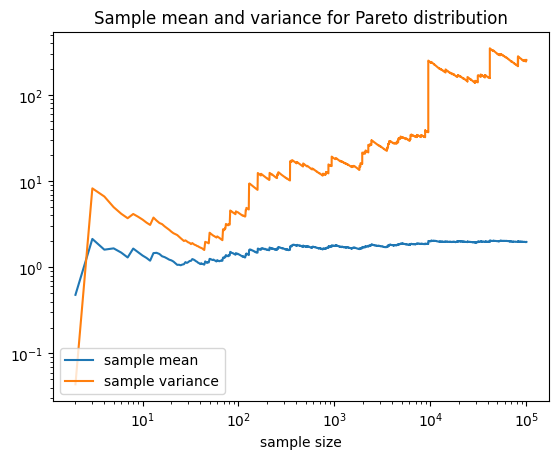

In [27]:
plt.clf();
mean_list = [np.mean(pareto_data[0:i]) for i in range(2,len(pareto_data)+1)];
var_list = [np.var(pareto_data[0:i],ddof=1.0) for i in range(2,len(pareto_data)+1)];
data_size_list =range(2,len(mean_list)+2);

plt.loglog(data_size_list,mean_list,label = 'sample mean');
plt.loglog(data_size_list,var_list,label = 'sample variance');
plt.legend(loc = 'lower left', fontsize = 10);
plt.title('Sample mean and variance for Pareto distribution')
plt.xlabel('sample size');
plt.show();

Let us repeat the above with data that was drawn from Cauchy distribution!

In [7]:
cauchy_data = np.random.standard_cauchy(num_points);

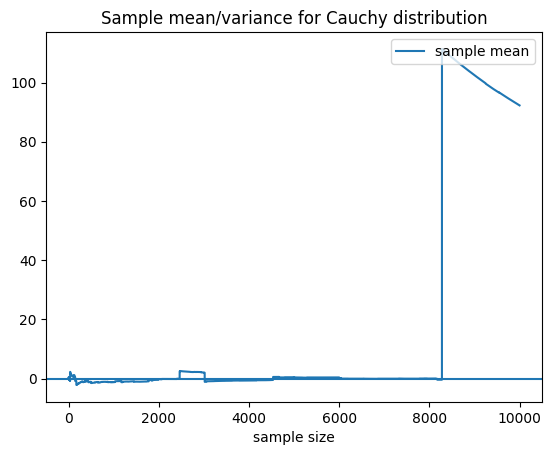

In [8]:
plt.clf();
mean_list = [np.mean(cauchy_data[0:i]) for i in range(2,len(cauchy_data)+1)];
var_list = [np.var(cauchy_data[0:i],ddof=1.0) for i in range(2,len(cauchy_data)+1)];
data_size_list = range(2,len(mean_list)+2);

plt.plot(data_size_list,mean_list,label='sample mean');
#plt.loglog(data_size_list,var_list,label='sample variance');
plt.legend(loc= 'upper right',fontsize = 10);
plt.title('Sample mean/variance for Cauchy distribution')
plt.xlabel('sample size');
plt.axhline(0)
plt.show();

## Simulating the stock market

A very simple model of a fluctuating stock value is the following: In every time step its value is either increased by 1 cent, or is decreased by 1 cent with equal probabilities.

Let's simulate this simply by drawing a random sequence of 1 and -1, and summing the obtained values. 

First we define the number of stocks, and the number of time steps.

In [9]:
num_stocks = 3;
num_time_steps = 10000;

We are going to put the generated time sequences of the stocks into a list.

In [10]:
stock_time_series_list = [];
stock_time_series_list.clear();
for i in range(0,num_stocks):
    rand_changes = list(np.random.choice([-1,1],num_time_steps)); # these are the random -1 and 1 dollars
    stock_value = [sum(rand_changes[0:n]) for n in range(1,len(rand_changes))]; # we simply add up the first n 
    stock_time_series_list.append(stock_value);

Let's make actually two plots: 
- first only up to the first 1000 time steps,
- next all the way up to 10000 time steps (and highlight within the area shown in the previous figure)

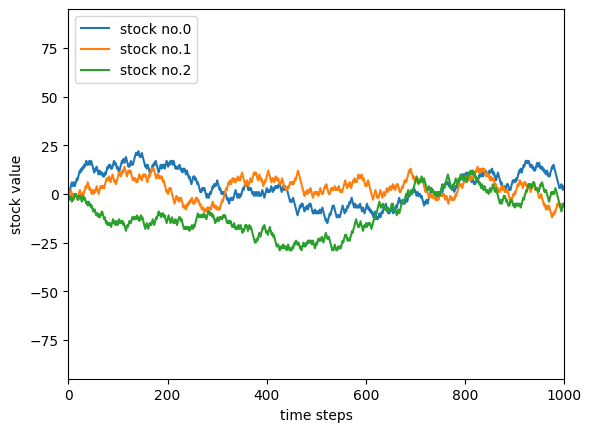

<Figure size 640x480 with 0 Axes>

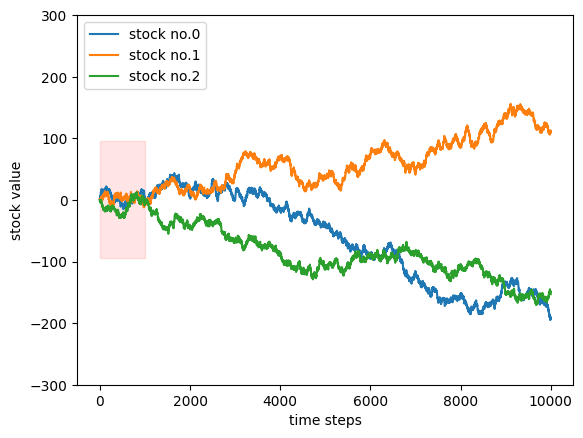

In [11]:
plt.clf();
t_list = range(0,len(stock_time_series_list[0]));
for i in range(0,len(stock_time_series_list)):
    plt.plot(t_list,stock_time_series_list[i],label = 'stock no.'+str(i));
plt.xlabel('time steps');
plt.ylabel('stock value');
plt.xlim(0,1000);
plt.ylim(-95,95);
#plt.ylim(-50,50)
plt.legend(loc= 'upper left',fontsize = 10);
plt.show();

plt.clf();
fig,ax = plt.subplots();
for i in range(0,len(stock_time_series_list)):
    plt.plot(t_list,stock_time_series_list[i],label = 'stock no.'+str(i));
plt.xlabel('time steps');
plt.ylabel('stock value');
plt.ylim(-300,300);
rect = patches.Rectangle((0,-95),1000,190,edgecolor='r',facecolor='r', alpha = 0.1);
ax.add_patch(rect);
plt.legend(loc= 'upper left',fontsize = 10);
plt.show();

- Observe that the two figures look quite similar. (More on that on the Fractals course).
- **What do you think, how was the vertical scale (set by ylim) chosen?**
- Try out changing the scale of the first figure to see that it does not look similar to the 2nd if the horisontal - vertical scales are not "properly" set.

## Covariance and correlation

Let us calculate the covariance and correlation for real data using Pandas. First we specify the data file name and have a "peek" at the data frame:

In [12]:
data_frame = pd.read_csv('ASC_cg_export.tsv',sep = '\t',low_memory=False);
#pd.read_csv(data_file,sep = '\t',low_memory=False)
data_frame

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
0,0,0.076000,0.031020,0.681708,0.136734
1,1,0.056540,0.041740,0.309939,0.833063
2,2,0.035931,0.027603,0.336823,0.779083
3,3,0.068871,0.029245,0.637028,0.220080
4,4,0.055457,0.031569,0.648768,0.158911
...,...,...,...,...,...
459,459,0.638267,0.725329,0.562665,0.682982
460,460,0.029312,0.037880,0.174917,0.820928
461,461,0.077343,0.030169,0.656111,0.164263
462,462,0.040083,0.032533,0.211228,0.763911


Let's check the column names:

In [13]:
data_frame.columns

Index(['patient_id', 'cg00510787', 'cg03169527', 'cg23256971', 'cg08585897'], dtype='object')

Before actually calculating the variance-covariance matrix, let's simply look at scatter plots, where we plot the value in a given column as a function of the value in another column.

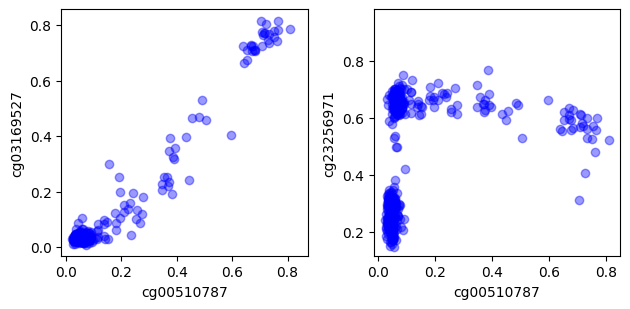

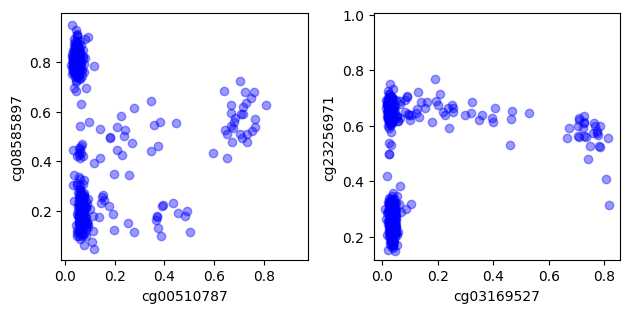

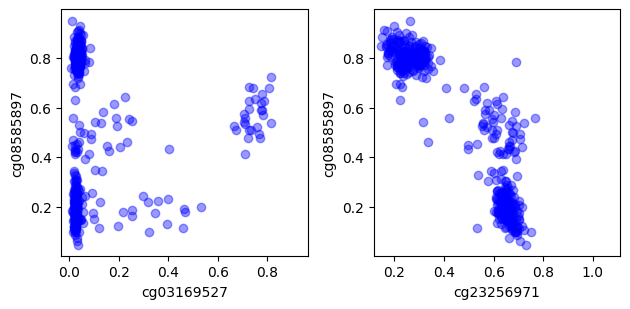

In [14]:
plt.clf();
plt.subplot(121)
plt.plot(data_frame['cg00510787'][:],data_frame['cg03169527'][:],'bo', alpha =0.4);
plt.xlabel('cg00510787');
plt.ylabel('cg03169527');
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');

plt.subplot(122)
plt.plot(data_frame.iloc[:,1],data_frame.iloc[:,3],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[1]);
plt.ylabel(data_frame.columns[3]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');
plt.tight_layout();
plt.show();

plt.clf();
plt.subplot(121)
plt.plot(data_frame.iloc[:,1],data_frame.iloc[:,4],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[1]);
plt.ylabel(data_frame.columns[4]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');

plt.subplot(122)
plt.plot(data_frame.iloc[:,2],data_frame.iloc[:,3],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[2]);
plt.ylabel(data_frame.columns[3]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');
plt.tight_layout();
plt.show();

plt.clf();
plt.subplot(121)
plt.plot(data_frame.iloc[:,2],data_frame.iloc[:,4],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[2]);
plt.ylabel(data_frame.columns[4]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');

plt.subplot(122)
plt.plot(data_frame.iloc[:,3],data_frame.iloc[:,4],'bo',alpha = 0.4);
plt.xlabel(data_frame.columns[3]);
plt.ylabel(data_frame.columns[4]);
plt.xlim(0,1);
plt.ylim(0,1);
plt.axis('square');
plt.tight_layout();
plt.show();

Let's now calculate the co-variance and the correlation matrices.

In [15]:
data_frame.cov()

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
patient_id,17980.000000,0.178541,0.440353,-1.510975,3.369657
cg00510787,0.178541,0.028208,0.029073,0.010195,-0.005973
cg03169527,0.440353,0.029073,0.031262,0.007102,-0.001742
cg23256971,-1.510975,0.010195,0.007102,0.039455,-0.053103
cg08585897,3.369657,-0.005973,-0.001742,-0.053103,0.083898


In [16]:
data_frame.corr()

,patient_id,cg00510787,cg03169527,cg23256971,cg08585897
patient_id,1.000000,0.007928,0.018565,-0.056703,0.086718
cg00510787,0.007928,1.000000,0.977906,0.305246,-0.122632
cg03169527,0.018565,0.977906,1.000000,0.202212,-0.034015
cg23256971,-0.056703,0.305246,0.202212,1.000000,-0.922989
cg08585897,0.086718,-0.122632,-0.034015,-0.922989,1.000000


Of course, covariance can be calculated also in numpy. To test this, let us first generate a multinomial data set. First we define the parameters of multinomial distribution, $N$ and a couple of $p_i$, where $\sum_i p_i=1$.

In [17]:
N_mn = 20;
p_mn = [0.1,0.2,0.3,0.4];

In [18]:
multinom_data = np.random.multinomial(N_mn,p_mn,10000); #first paramater is N, then comes the list of p_i,
                                                                  #finally the number of draws.
#print(multinom_data);

In [19]:
multinom_cov_matr = np.cov(np.transpose(multinom_data));
print(multinom_cov_matr);

[[ 1.81643675 -0.37690201 -0.60740714 -0.8321276 ]
 [-0.37690201  3.18882672 -1.19064226 -1.62128245]
 [-0.60740714 -1.19064226  4.23075908 -2.43270967]
 [-0.8321276  -1.62128245 -2.43270967  4.88611972]]


As a comparison, let's also calculate the theoretical variance-covariance matrix.

In [20]:
theor_cov_matr = [[- N_mn*p_mn[i]*p_mn[j] if j!= i else N_mn*p_mn[i]*(1.0-p_mn[i]) for j in range(0,len(p_mn))] for i in range(0,len(p_mn))];
for line in theor_cov_matr:
    print(line);

[1.8, -0.4, -0.6, -0.8]
[-0.4, 3.2, -1.2, -1.6]
[-0.6000000000000001, -1.2000000000000002, 4.199999999999999, -2.4000000000000004]
[-0.8, -1.6, -2.4, 4.8]


# Inequalities

Let us assume IID Bernoulli random variables such as coin flips, where we do not know the parameter $p$, and only have access to the generated sample.

Our best guess (estimate) for $p$ based on the observed data is given by
\begin{equation}
\widehat{p}=\overline{X_n}=\frac{1}{n}\sum_{i=1}^n x_i.\nonumber
\end{equation}


Hoeffding's inequality states that as $n$ is increased, this estimate is getting exponentialy close to the true value of $p$, since
\begin{equation}
P\left(\left| \overline{X_n}- p\right| \geq \epsilon\right)\leq 2 e^{-2n\epsilon^2}.\nonumber
\end{equation}

Based on that we can construct an interval (called confidence interval) around the estimate $\widehat{p}=\overline{X_n}$ for which we can write down a guaranteed lower bound on the probability that the true $p$ falls within the interval. 

Let us choose the guaranteed lower bound as $1-\alpha$, where $\alpha$ is a parameter. For a fixed $\alpha$, the interval can be given as $\left[\overline{X_n}-\epsilon,\overline{X_n}+\epsilon\right]$ where  
\begin{equation}
\epsilon = \sqrt{\frac{1}{2n}\ln\left(\frac{2}{\alpha}\right)}, \nonumber
\end{equation}
and in such a setting 
\begin{equation}
P\left(\overline{X_n}-\epsilon \leq p \leq \overline{X_n}+\epsilon\right)\geq 1-\alpha.\nonumber
\end{equation}




Let us test this by actually generating Bernoulli random variables and measuring the **coverage** of the above interval, where coverage is the ratio of experiments where the true $p$ did fall into the interval.

First, we define the parameters.

In [21]:
p_true = 0.4;       # the p parameter of the Bernoulli distribution
num_flips = 500;   # the number of data points in one experiment
num_series = 1000;   # the number of experiments.
alpha = 0.05;

Let's just try out generating a small sample.

In [22]:
Bernoulli_samp = list(np.random.choice([1,0],p=[p_true,1.0-p_true],size=10));
print(Bernoulli_samp);

[np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0)]


OK, it seems working, let's now generate the longer samples.

In [23]:
B_series = [list(np.random.choice([1,0],p=[p_true,1.0-p_true],size=num_flips)) for i in range(0,num_series)];

And finally let's see how does the coverage depend on the number of flips. 

In [24]:
cover_list,epsilon_list = [],[];
cover_list.clear();
epsilon_list.clear();
for n in range(1,num_flips):
    epsilon = math.sqrt(math.log(2.0/alpha)*0.5/n);
    epsilon_list.append(epsilon);
    cover_indicator = [ 1 if(abs(p_true - np.mean(B_s[0:n])) < epsilon) else 0 for B_s in B_series];
    coverage = sum(cover_indicator)/len(B_series);
    cover_list.append(coverage);    
    #print('n=',n,'coverage=',coverage);    

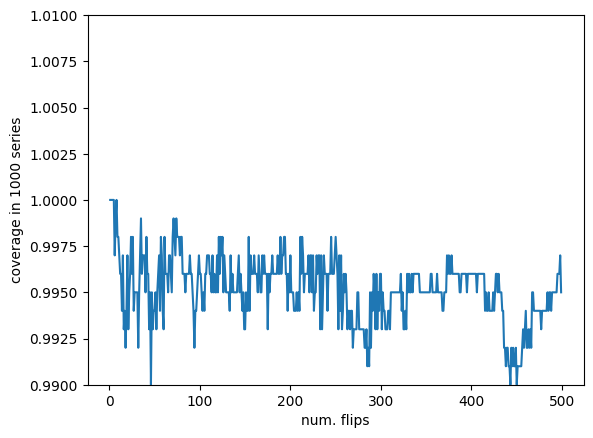

In [25]:
plt.clf();
x_list = range(1,len(cover_list)+1);
plt.plot(x_list,cover_list);
plt.ylim(0.99,1.01);
plt.xlabel('num. flips');
plt.ylabel('coverage in '+str(num_series)+' series');
plt.show();